In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from datetime import datetime

In [136]:
time_series = pd.date_range('2022-01-01','2022-01-02',freq='1min')
data = pd.Series(range(len(time_series)),index=time_series)

In [137]:
print(data)

2022-01-01 00:00:00       0
2022-01-01 00:01:00       1
2022-01-01 00:02:00       2
2022-01-01 00:03:00       3
2022-01-01 00:04:00       4
                       ... 
2022-01-01 23:56:00    1436
2022-01-01 23:57:00    1437
2022-01-01 23:58:00    1438
2022-01-01 23:59:00    1439
2022-01-02 00:00:00    1440
Freq: T, Length: 1441, dtype: int64


In [138]:
downsampled_data = data.resample('5min').asfreq()

In [139]:
print(downsampled_data)

2022-01-01 00:00:00       0
2022-01-01 00:05:00       5
2022-01-01 00:10:00      10
2022-01-01 00:15:00      15
2022-01-01 00:20:00      20
                       ... 
2022-01-01 23:40:00    1420
2022-01-01 23:45:00    1425
2022-01-01 23:50:00    1430
2022-01-01 23:55:00    1435
2022-01-02 00:00:00    1440
Freq: 5T, Length: 289, dtype: int64


In [140]:
df = pd.read_csv('shampoo_sales.csv',parse_dates=['Month'])

C:\Users\admin\AppData\Local\Temp\ipykernel_3288\3448047085.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('shampoo_sales.csv',parse_dates=['Month'])


In [141]:
df.set_index('Month',inplace = True)

<Axes: xlabel='Month'>

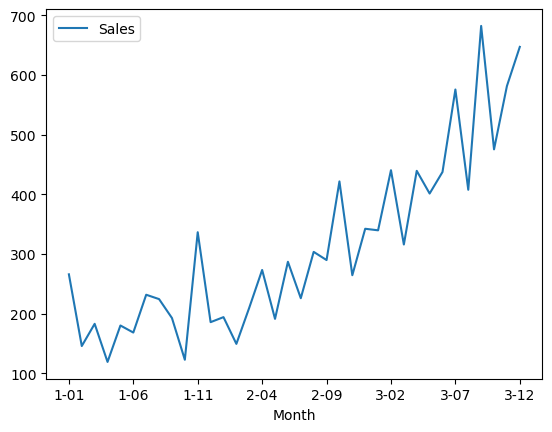

In [142]:
df.plot()

In [143]:
df.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [144]:
df.tail()

,Sales
Month,
3-08,407.6
3-09,682.0
3-10,475.3
3-11,581.3
3-12,646.9


C:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


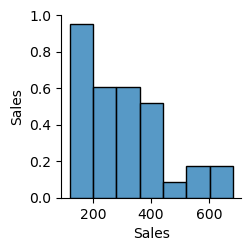

In [145]:
sns.pairplot(df)

In [146]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [147]:
series = pd.read_csv('shampoo_sales.csv',header = 0,parse_dates=[0],index_col=0,date_parser=parser)

C:\Users\admin\AppData\Local\Temp\ipykernel_3288\4177254935.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('shampoo_sales.csv',header = 0,parse_dates=[0],index_col=0,date_parser=parser)


<Axes: xlabel='Month'>

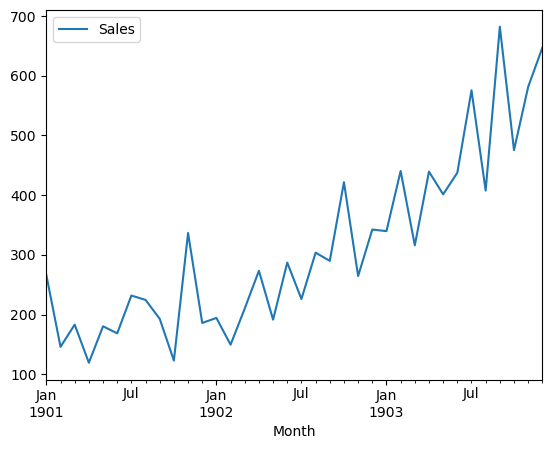

In [148]:
series.plot()

In [149]:
print(series)

            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3
1901-06-01  168.5
1901-07-01  231.8
1901-08-01  224.5
1901-09-01  192.8
1901-10-01  122.9
1901-11-01  336.5
1901-12-01  185.9
1902-01-01  194.3
1902-02-01  149.5
1902-03-01  210.1
1902-04-01  273.3
1902-05-01  191.4
1902-06-01  287.0
1902-07-01  226.0
1902-08-01  303.6
1902-09-01  289.9
1902-10-01  421.6
1902-11-01  264.5
1902-12-01  342.3
1903-01-01  339.7
1903-02-01  440.4
1903-03-01  315.9
1903-04-01  439.3
1903-05-01  401.3
1903-06-01  437.4
1903-07-01  575.5
1903-08-01  407.6
1903-09-01  682.0
1903-10-01  475.3
1903-11-01  581.3
1903-12-01  646.9


In [150]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

In [151]:
series1 = pd.read_csv('shampoo_sales.csv',header = 0,parse_dates=[0],index_col=0,date_parser=parser)

C:\Users\admin\AppData\Local\Temp\ipykernel_3288\2343557615.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series1 = pd.read_csv('shampoo_sales.csv',header = 0,parse_dates=[0],index_col=0,date_parser=parser)


In [152]:
upsampled = series1.resample('D')

In [153]:
interpolated = upsampled.interpolate(method = 'linear')

In [154]:
print(interpolated.head(5))

                 Sales
Month                 
1901-01-01  266.000000
1901-01-02  262.125806
1901-01-03  258.251613
1901-01-04  254.377419
1901-01-05  250.503226


In [155]:
interpolated = upsampled.interpolate(method='spline',order=2)

In [156]:
print(interpolated.head(5))

                 Sales
Month                 
1901-01-01  266.000000
1901-01-02  258.630160
1901-01-03  251.560886
1901-01-04  244.720748
1901-01-05  238.109746


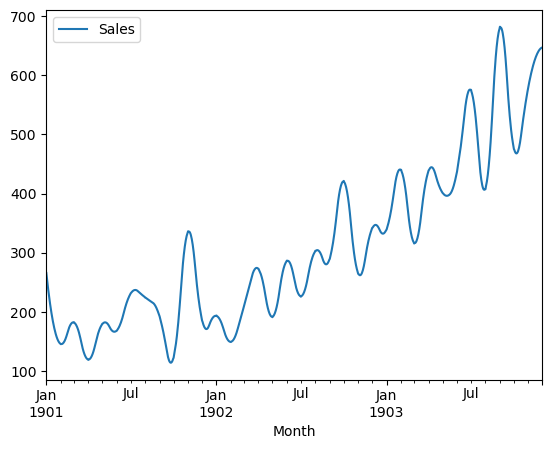

In [157]:
interpolated.plot()
plt.show()

In [158]:
resample = series1.resample('Q')

In [159]:
quarterly_mean_sales = resample.mean()

In [160]:
print(quarterly_mean_sales.head())

                 Sales
Month                 
1901-03-31  198.333333
1901-06-30  156.033333
1901-09-30  216.366667
1901-12-31  215.100000
1902-03-31  184.633333


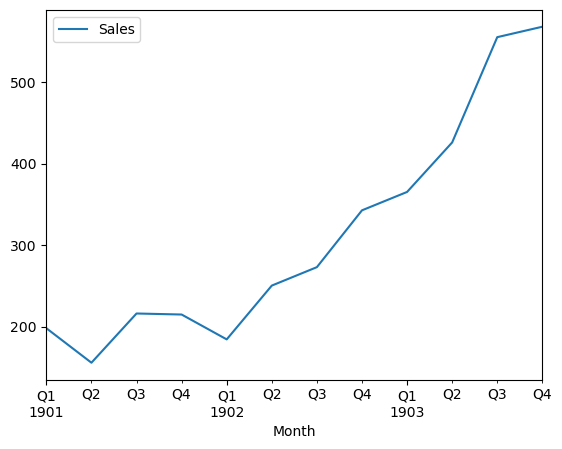

In [161]:
quarterly_mean_sales.plot()
plt.show()

In [162]:
resample = series.resample('A')

In [163]:
quarterly_mean_sales = resample.sum()

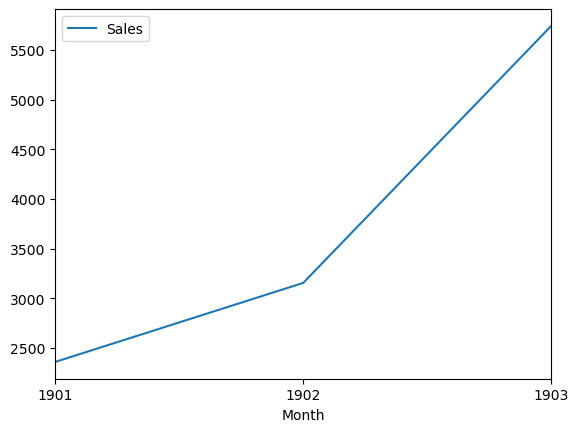

In [164]:
quarterly_mean_sales.plot()
plt.show()

How will you choose the right interpolation method for a dataset ? Justify.

Choosing Interpolation Methods for a Dataset:
1.Nature of Data: Continuous or categorical,trends and seasonality.
2.Missing Data: Random or systematic,percentage of missing values.
3.Methodology: Preserving data characteristics,smoothness vs. accuracy.
4.Computational Complexity: Scalability, ease of implementation.
5.Validation: Cross-validation,domain expertise.

Common Methods:
1.Linear Interpolation(simple,linear connections)
2.Polynomial Interpolation(captures complex trends)
3.Splin Interpolation(smooth curves)
4.Nearest Neighbor(simple,categorial data)
5.Kriging(advanced,geostatistical)